This notebook contains a collection of goodness-of-fit tests

In [1]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from tqdm import tqdm
from sklearn.metrics import *
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
tqdm.pandas()


%matplotlib inline

In [2]:
# Run all models
from src.models import *

balancing...
repairs: 27.73092578545258%, non-repairs: 72.26907421454743%
Fitting 1-layer hierarchical Bayesian models...


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [c, ppt, sigma_c, mu_c, ppt_sig, ppt_mu]


/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 100 tune and 100 draw iterations (300 + 300 draws total) took 1506 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [c, hydr, sigma_c, mu_c, hydr_sig, hydr_mu]


/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 100 tune and 100 draw iterations (300 + 300 draws total) took 1535 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [c, dem, sigma_c, mu_c, dem_beta]


/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 100 tune and 100 draw iterations (300 + 300 draws total) took 2553 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.9697828066814971, but should be close to 0.99. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedep

/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 100 tune and 100 draw iterations (300 + 300 draws total) took 1582 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [c, dem, hse, hydr, ppt, sigma_c, mu_c, dem_beta, hse_sig, hydr

/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 100 tune and 100 draw iterations (300 + 300 draws total) took 3932 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.9708668395100559, but should be close to 0.99. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedep

Fitting pooled Bayesian models...


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [c, ppt, sigma_c, mu_c, ppt_sig, ppt_mu]


/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 100 tune and 100 draw iterations (300 + 300 draws total) took 1093 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.

/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 100 tune and 100 draw iterations (300 + 300 draws total) took 1178 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.

/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 100 tune and 100 draw iterations (300 + 300 draws total) took 922 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.


/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 100 tune and 100 draw iterations (300 + 300 draws total) took 951 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.


fitting full pooled Bayesian model...


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [c, dem, hse, hydr, ppt, sigma_c, mu_c, dem_beta, hse_sig, hydr_sig, hydr_mu, ppt_sig, ppt_mu]


/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 100 tune and 100 draw iterations (300 + 300 draws total) took 1676 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.

# Goodness-of-Fit Analyses

In general, GoF tests have the following form: $fit - penalty$ (where lower values mean imply better predictive models)

Where the $fit$ typically measures how uncertain the prediction is to variation in parameters: $log(\frac{1}{N}\sum_{i=1}^NP(y|\hat{\theta_i}))$. If for all $\theta_i$, the probability of predicting y is always 1 (certain), then $log(1) = 0$

Where the $penalty$ typically measures the variance of the fitted posterior: $Var_{i=1}^nlog(P(y|\hat{\theta_i}))$

Models summary:
1. _Water model_: __distance to water bodies, annual maxima precipitation__
2. _Soil model_: distance to water bodies, annual maxima precipitation, __soil hydraulic conductivity__
3. _Socio model_: distance to water bodies, annual maxima precipitation, soil hydraulic conductivity, __median housing value__
4. _Topo model_: distance to water bodies, annual maxima precipitation, soil hydraulic conductivity, median housing value, __flow accumulation, elevation__

## 1. Widely Applicable Information Criterion (WAIC)
$fit = \sum_{i=1}^s-2log(\frac{1}{n}\sum_{j=1}^nP(y_i|\hat{\theta_j}))$ (for all points $s$)

$penalty = \sum_{i=1}^sVar_{j=1}^nlog(P(y_i|\hat{\theta_j}))$ (for all points $s$)

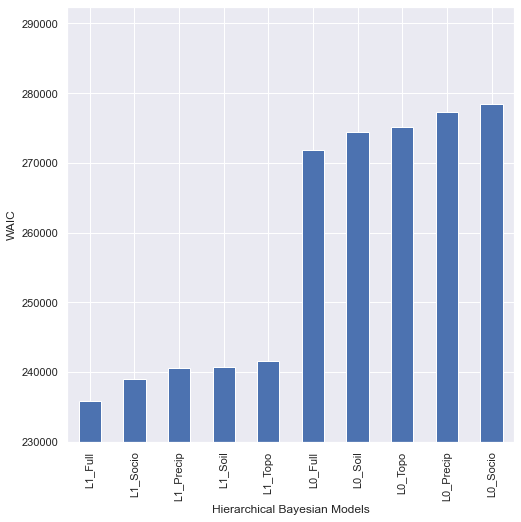

In [16]:
waic_df = pm.compare(traces_dict, ic='WAIC', scale='deviance')
waic_df.reset_index(inplace=True)

# Plot WAIC (lower is better)
f, ax = plt.subplots(figsize=(8,8))
waic_df['waic'].plot.bar(ax=ax)
ax.set_ylim(230000)
ax.set_xticks(range(len(waic_df)))
ax.set_xticklabels(waic_df['index'].values, rotation='vertical')
# ax.set_title('WAIC GoF')
ax.set_xlabel('Hierarchical Bayesian Models')
ax.set_ylabel('WAIC')
f.savefig('../docs/waic_line.pdf', dpi=300)

In [4]:
waic_df

,index,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
0,L1_Full,0,235808.972934,1027.397135,0.000000,0.975510,377.337629,0.000000,True,deviance
1,L1_Socio,1,239015.917651,524.013410,3206.944717,0.000000,365.783190,110.070084,True,deviance
2,L1_Precip,2,240544.550516,569.077143,4735.577582,0.000000,360.379122,133.252752,False,deviance
3,L1_Soil,3,240730.058290,557.699939,4921.085356,0.000000,360.018882,135.564758,False,deviance
4,L1_Topo,4,241532.321063,407.490727,5723.348129,0.022188,356.902427,147.874171,True,deviance
5,L0_Full,5,271854.272466,4.884765,36045.299532,0.000000,161.964160,351.392748,False,deviance
6,L0_Soil,6,274403.506282,2.019562,38594.533348,0.002302,131.510130,361.933885,False,deviance
7,L0_Topo,7,275142.344540,2.064718,39333.371606,0.000000,122.479137,364.602939,False,deviance
8,L0_Precip,8,277322.191709,2.442571,41513.218775,0.000000,79.589227,372.529552,False,deviance
9,L0_Socio,9,278459.252432,2.400665,42650.279498,0.000000,41.352879,376.003688,False,deviance


Text(0, 0.5, 'WAIC relative error (%)')

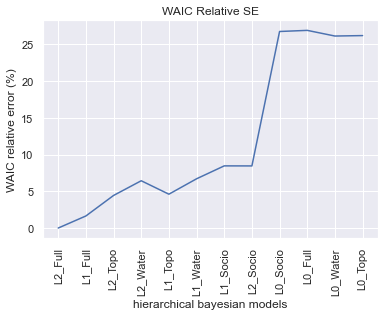

In [4]:
# Plot WAIC relative SE
ax = waic_df['dse'].plot()

ax.set_xticks(range(len(waic_df)))
ax.set_xticklabels(waic_df['index'].values, rotation='vertical')
ax.set_title('WAIC Relative SE')
ax.set_xlabel('hierarchical bayesian models')
ax.set_ylabel('WAIC relative error (%)')

Text(0, 0.5, 'WAIC')

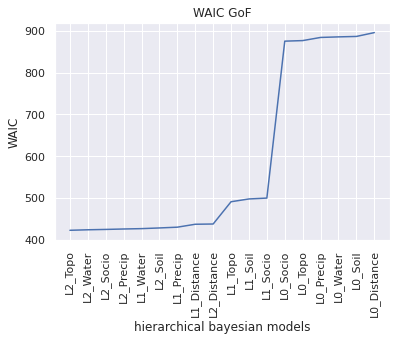

In [ ]:
opt_waic_df = pm.compare(opt_traces_dict, ic='WAIC', scale='deviance')
opt_waic_df.reset_index(inplace=True)

# Plot WAIC (lower is better)
ax = opt_waic_df['waic'].plot.line()
ax.set_xticks(range(len(opt_waic_df)))
ax.set_xticklabels(opt_waic_df['index'].values, rotation='vertical')
ax.set_title('WAIC GoF')
ax.set_xlabel('hierarchical bayesian models')
ax.set_ylabel('WAIC')

Text(0, 0.5, 'WAIC relative error (%)')

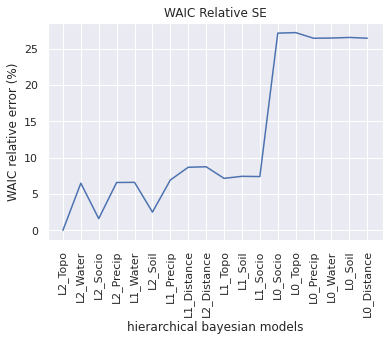

In [ ]:
# Plot WAIC relative SE
ax = opt_waic_df['dse'].plot()

ax.set_xticks(range(len(opt_waic_df)))
ax.set_xticklabels(opt_waic_df['index'].values, rotation='vertical')
ax.set_title('WAIC Relative SE')
ax.set_xlabel('hierarchical bayesian models')
ax.set_ylabel('WAIC relative error (%)')

In [5]:
# Prettier graph: sort in the right order TODO: cleaner function to sort
# l2_sorter = ['L2_Water', 'L2_Topo', 'L2_Socio', 'L2_Full']
# l2 = waic_df[waic_df['index'].str[:2] == 'L2'].set_index('index')
# l2 = l2.loc[l2_sorter]
# l2_waic, l2_dse = l2.waic.values, l2.dse.values

l1_sorter = ['L1_Precip', 'L1_Soil', 'L1_Topo', 'L1_Socio', 'L1_Full']
l1 = waic_df[waic_df['index'].str[:2] == 'L1'].set_index('index')
l1 = l1.loc[l1_sorter]
l1_waic, l1_dse = l1.waic.values, l1.dse.values

l0_sorter = ['L0_Precip', 'L0_Soil', 'L0_Topo', 'L0_Socio', 'L0_Full']
l0 = waic_df[waic_df['index'].str[:2] == 'L0'].set_index('index')
l0 = l0.loc[l0_sorter]
l0_waic, l0_dse = l0.waic.values, l0.dse.values

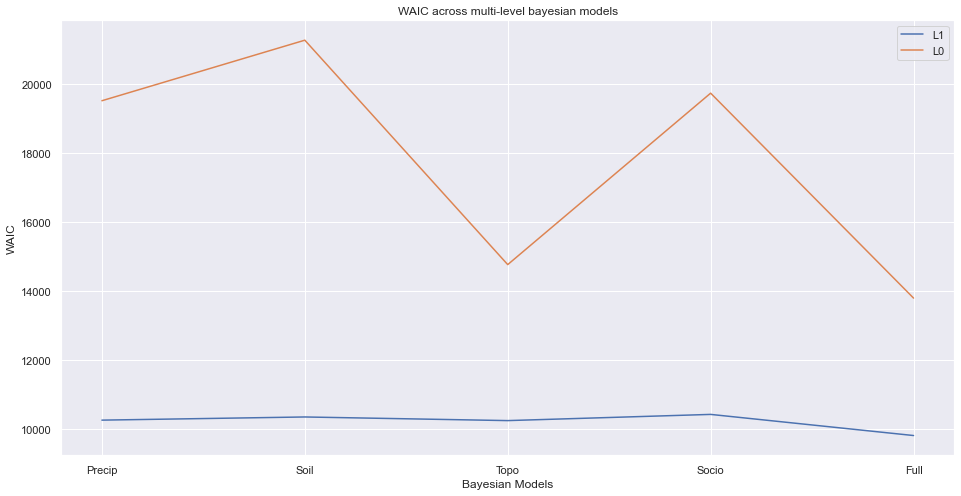

In [16]:
# WAIC
x = ['Precip', 'Soil', 'Topo', 'Socio', 'Full']
f, ax = plt.subplots(figsize=(16,8))
# ax.plot(x, l2_waic, label='L2')
ax.plot(x, l1_waic, label='L1')
ax.plot(x, l0_waic, label='L0')
ax.set_title('WAIC across multi-level bayesian models')
ax.set_xlabel('Bayesian Models')
ax.set_ylabel('WAIC')
ax.legend()

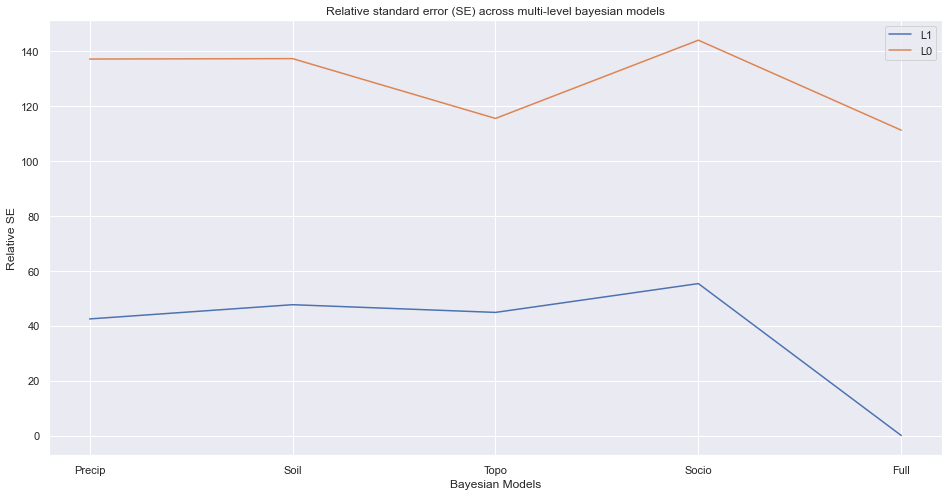

In [18]:
# Uncertainty (dSE)
x = ['Precip', 'Soil', 'Topo', 'Socio', 'Full']
f, ax = plt.subplots(figsize=(16,8))
# ax.plot(x, l2_dse, label='L2')
ax.plot(x, l1_dse, label='L1')
ax.plot(x, l0_dse, label='L0')
ax.set_title('Relative standard error (SE) across multi-level bayesian models')
ax.set_xlabel('Bayesian Models')
ax.set_ylabel('Relative SE')
ax.legend()

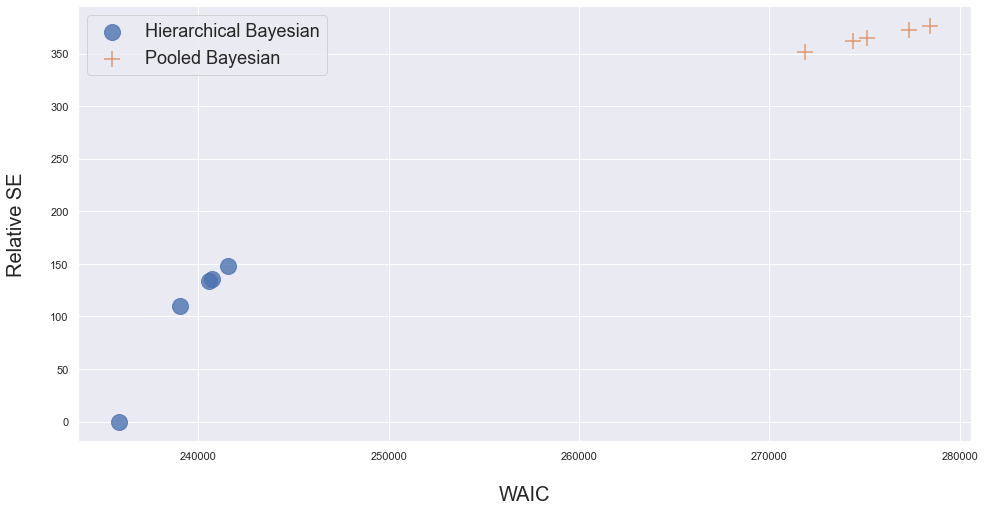

In [8]:
# SE vs WAIC
f, ax = plt.subplots(figsize=(16,8))
ax.scatter(l1_waic, l1_dse, label='Hierarchical Bayesian', marker='o', alpha=0.8, s=256)
ax.scatter(l0_waic, l0_dse, label='Pooled Bayesian', marker='+', alpha=0.8, s=256)
ax.set_xlabel('WAIC', labelpad= 24, fontsize=20)
ax.set_ylabel('Relative SE', labelpad=24, fontsize=20)
ax.legend(fontsize=18)
f.savefig('../docs/waic_se_all.pdf', dpi=300, bbox_inches='tight')

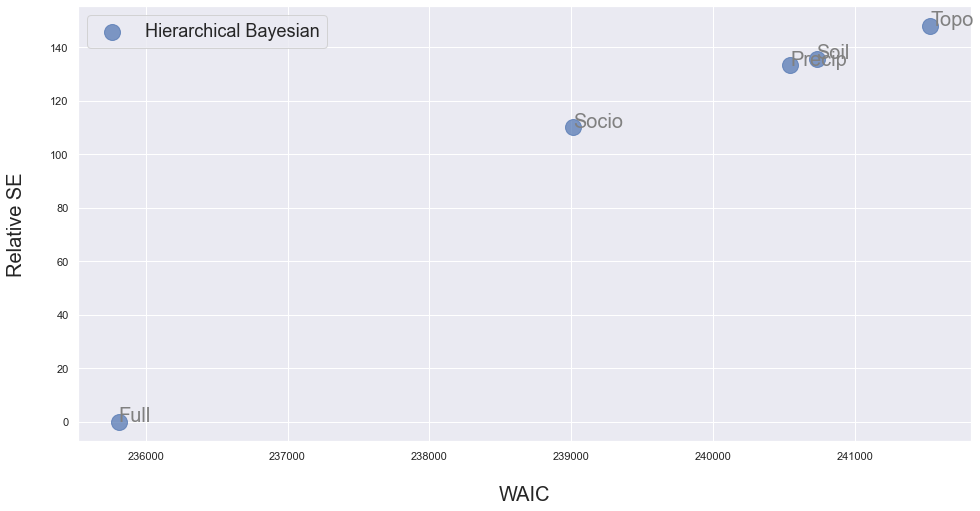

In [9]:
# SE vs WAIC (without l0)
x = ['Precip', 'Soil', 'Topo', 'Socio', 'Full']
f, ax = plt.subplots(figsize=(16,8))
ax.scatter(l1_waic, l1_dse, label='Hierarchical Bayesian', marker='o', alpha=0.7, s=256)
# ax.scatter(l0_waic, l0_dse, label='Pooled Bayesian', marker='+', alpha=0.7, s=256)
ax.set_xlabel('WAIC', labelpad=24, fontsize=20)
ax.set_ylabel('Relative SE', labelpad=24, fontsize=20)

for i, txt in enumerate(x):
    ax.annotate(txt, (l1_waic[i] - 0.5, l1_dse[i] + 0.2), fontsize=20, color='gray')
ax.legend(fontsize=18)
f.savefig('../docs/waic_se_l12.pdf', dpi=300, bbox_inches='tight')